# Exploratory Analysis - Coding Challenge
<hr style="border:2px solid black">

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd
from scipy.sparse import csr_matrix
plt.style.use('ggplot')

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



---
## Ratings table

#### How many unique users and movies are in the dataset?

In [9]:
df = pd.read_csv("/Users/wukaiti/Spiced/my_encounter_notes/week_10/Recommender_Systems/ml-latest-small/ratings.csv")
len(df.userId.unique())

610

#### What is the average rating

In [11]:
rate = pd.read_csv("/Users/wukaiti/Spiced/my_encounter_notes/week_10/Recommender_Systems/ml-latest-small/ratings.csv")
df.rating.mean()

3.501556983616962

#### which rating appears the most?

In [15]:
rate.rating.value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [16]:
rate.rating.value_counts(normalize=True)

rating
4.0    0.265957
3.0    0.198808
5.0    0.131015
3.5    0.130271
4.5    0.084801
2.0    0.074884
2.5    0.055040
1.0    0.027877
1.5    0.017762
0.5    0.013586
Name: proportion, dtype: float64

In [19]:
rate.groupby("userId")["rating"].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [20]:
user_rating_counts= rate.groupby("userId")["rating"].count()
# Create a boolean mask for users who have rated more than 20 movies
mask = user_rating_counts > 20

# Apply the mask to filter the users
filtered_users = user_rating_counts[mask]

print(filtered_users)

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 596, dtype: int64


- How many users have rated more than 20 movies?

In [21]:
import pandas as pd

user_rating_counts = rate.groupby("userId")["rating"].count()

# Find the maximum and minimum number of ratings
max_ratings = user_rating_counts.max()
min_ratings = user_rating_counts.min()

print(f"The user with the most ratings, rated {max_ratings} movies.")
print(f"The user with the least ratings, rated {min_ratings} movies.")


The user with the most ratings, rated 2698 movies.
The user with the least ratings, rated 20 movies.


- How many movies rated the user with the most/ least ratings?

In [23]:
# Find the median number of ratings
median_ratings = user_rating_counts.median()

print(f"The median number of ratings is {median_ratings}.")

The median number of ratings is 70.5.


-  What is the *median* number of ratings?

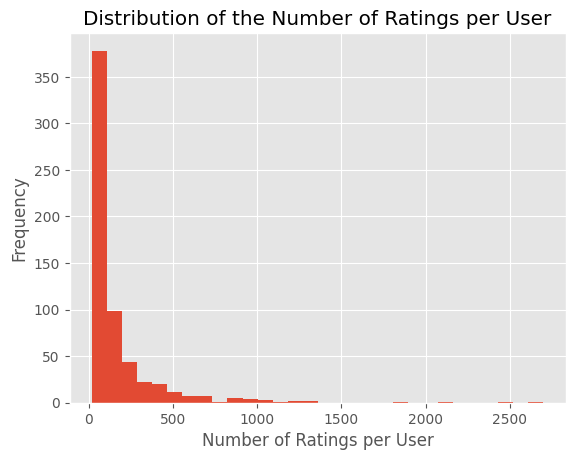

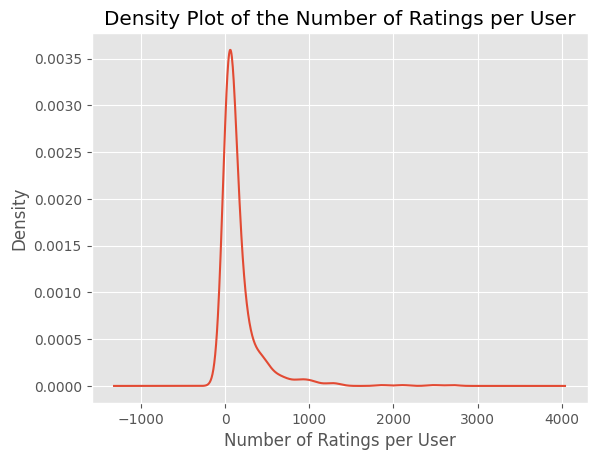

In [24]:
# Draw a histogram
user_rating_counts.hist(bins=30)
plt.title('Distribution of the Number of Ratings per User')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.show()

# Draw a density plot
user_rating_counts.plot(kind='density')
plt.title('Density Plot of the Number of Ratings per User')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Density')
plt.show()

- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution?
    - Hint: `sns.histplot()`

In [25]:
average_rating_per_user = rate.groupby("userId")["rating"].mean()

print(average_rating_per_user)

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64


---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [26]:
import pandas as pd

average_rating_per_user = rate.groupby("userId")["rating"].mean()

# Find the user who gave the worst ratings on average
worst_rater = average_rating_per_user.idxmin()

# Find the user who gave the best ratings on average
best_rater = average_rating_per_user.idxmax()

print(f"The user who gave the worst ratings on average is user {worst_rater}.")
print(f"The user who gave the best ratings on average is user {best_rater}.")


The user who gave the worst ratings on average is user 442.
The user who gave the best ratings on average is user 53.


- Which user gave the worst ratings on average, which user gave the best ratings?

In [28]:
import pandas as pd

# Filter out users who have rated less than 20 movies
filtered_rate = rate.groupby("userId").filter(lambda x: len(x) >= 20)

# Recalculate the average rating per user
average_rating_per_user = filtered_rate.groupby("userId")["rating"].mean()

# Find the user who gave the worst ratings on average
worst_rater = average_rating_per_user.idxmin()

# Find the user who gave the best ratings on average
best_rater = average_rating_per_user.idxmax()

print(f"The user who gave the worst ratings on average (among users who have rated at least 20 movies) is user {worst_rater}.")
print(f"The user who gave the best ratings on average (among users who have rated at least 20 movies) is user {best_rater}.")


The user who gave the worst ratings on average (among users who have rated at least 20 movies) is user 442.
The user who gave the best ratings on average (among users who have rated at least 20 movies) is user 53.


- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

- Plot the distribution of average ratings! How would you characterize the distribution?

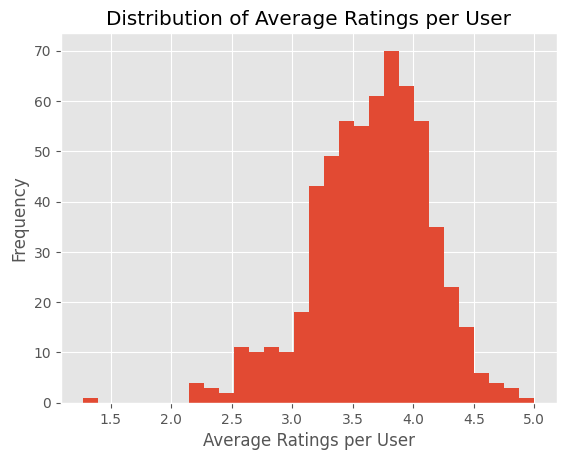

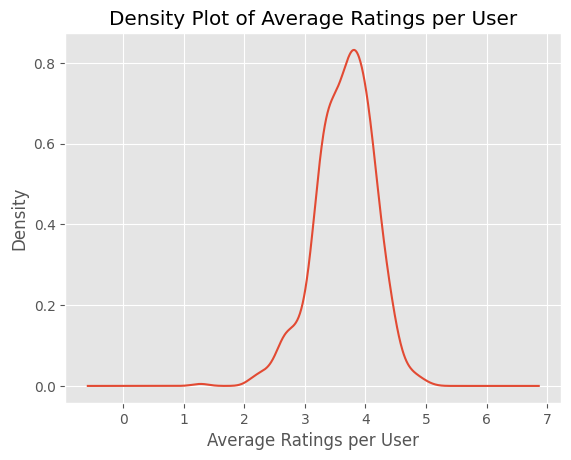

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Draw a histogram
average_rating_per_user.hist(bins=30)
plt.title('Distribution of Average Ratings per User')
plt.xlabel('Average Ratings per User')
plt.ylabel('Frequency')
plt.show()

# Draw a density plot
average_rating_per_user.plot(kind='density')
plt.title('Density Plot of Average Ratings per User')
plt.xlabel('Average Ratings per User')
plt.ylabel('Density')
plt.show()


- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

The correlation between the average rating and the number of ratings per user is -0.1989972709982265.


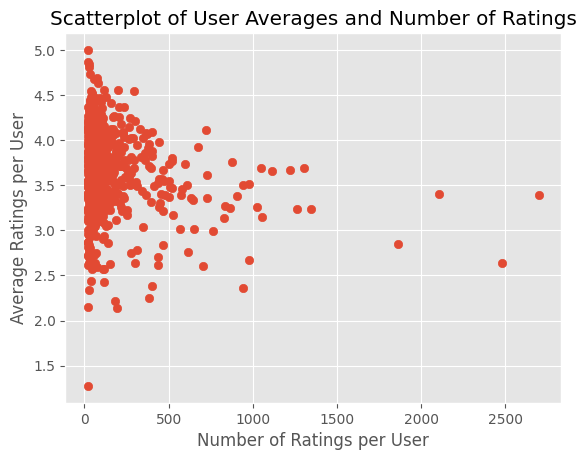

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out users who have rated less than 10 movies
filtered_rate = rate.groupby("userId").filter(lambda x: len(x) >= 10)

# Calculate the average rating per user
average_rating_per_user = filtered_rate.groupby("userId")["rating"].mean()

# Calculate the number of ratings per user
number_of_ratings_per_user = filtered_rate.groupby("userId")["rating"].count()

# Calculate the correlation
correlation = average_rating_per_user.corr(number_of_ratings_per_user)
print(f"The correlation between the average rating and the number of ratings per user is {correlation}.")

# Draw a scatterplot
plt.scatter(number_of_ratings_per_user, average_rating_per_user)
plt.title('Scatterplot of User Averages and Number of Ratings')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Average Ratings per User')
plt.show()


average_rating_per_user.corr(number_of_ratings_per_user) will calculate the correlation between the average rating and the number of ratings per user. A positive correlation would indicate that users who have given more ratings are also stricter in their ratings, while a negative correlation would indicate the opposite.

The scatterplot will show the relationship between the number of ratings per user and the average ratings per user. Each point on the scatterplot represents a user. The x-coordinate of the point is the number of ratings the user has given, and the y-coordinate of the point is the average rating the user has given.







--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [31]:
movie = pd.read_csv("/Users/wukaiti/Spiced/my_encounter_notes/week_10/Recommender_Systems/ml-latest-small/movies.csv")

In [67]:
duplicated_titles = movie['title'].duplicated()

# Check if there are any duplicated titles
if duplicated_titles.any():
    print("There are duplicated titles.")
else:
    print("There are no duplicated titles.")

# Assuming movie is your DataFrame and 'title' is the column with movie titles
duplicated_titles = movie[movie['title'].duplicated(keep=False)]['title']

# Print the duplicated titles
print("They are:",duplicated_titles.unique())



There are duplicated titles.
They are: ['Emma (1996)' 'Saturn 3 (1980)' 'Confessions of a Dangerous Mind (2002)'
 'Eros (2004)' 'War of the Worlds (2005)']


#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [66]:
missing_movie_ids = movie[~movie['movieId'].isin(rate['movieId'])]

# Check if there are any missing movie ids
if missing_movie_ids.empty:
    print("There are no movieIds in the movies table that are not in the ratings table.")
else:
    print("There are movieIds in the movies table that are not in the ratings table.")
    print(missing_movie_ids)



There are movieIds in the movies table that are not in the ratings table.
      movieId                                         title   
816      1076                         Innocents, The (1961)  \
2211     2939                                Niagara (1953)   
2499     3338                        For All Mankind (1989)   
2587     3456  Color of Paradise, The (Rang-e khoda) (1999)   
3118     4194                I Know Where I'm Going! (1945)   
4037     5721                            Chosen, The (1981)   
4506     6668   Road Home, The (Wo de fu qin mu qin) (1999)   
4598     6849                                Scrooge (1970)   
4704     7020                                  Proof (1991)   
5020     7792                     Parallax View, The (1974)   
5293     8765                      This Gun for Hire (1942)   
5421    25855                  Roaring Twenties, The (1939)   
5452    26085                   Mutiny on the Bounty (1962)   
5749    30892            In the Realms of th

#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [65]:
movie['year'] = movie['title'].str.extract(r'\((\d{4})\)', expand=False)

# Print the DataFrame with the extracted year
print(movie[['title', 'year']])


                                          title  year
0                              Toy Story (1995)  1995
1                                Jumanji (1995)  1995
2                       Grumpier Old Men (1995)  1995
3                      Waiting to Exhale (1995)  1995
4            Father of the Bride Part II (1995)  1995
...                                         ...   ...
9737  Black Butler: Book of the Atlantic (2017)  2017
9738               No Game No Life: Zero (2017)  2017
9739                               Flint (2017)  2017
9740        Bungo Stray Dogs: Dead Apple (2018)  2018
9741        Andrew Dice Clay: Dice Rules (1991)  1991

[9742 rows x 2 columns]


#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [64]:
# Step 1: Split the genre column
genre_split = movie['genres'].str.split('|')

# Step 2: Explode the genre_split list entries
genre_exploded = genre_split.explode()

# Create a new DataFrame for the genre table
genre_table = pd.DataFrame({'genre': genre_exploded})

# Step 3: Find the movieId with the most genres assigned
most_genres_movie = genre_table['genre'].value_counts().idxmax()

# Print the movieId with the most genres assigned
print(f"The movieId with the most genres assigned is: {most_genres_movie}")


The movieId with the most genres assigned is: Drama


---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [63]:
merged_df = rate.merge(movie, on='movieId')

# Print the merged DataFrame
print(merged_df)


        userId  movieId  rating   timestamp                             title   
0            1        1     4.0   964982703                  Toy Story (1995)  \
1            5        1     4.0   847434962                  Toy Story (1995)   
2            7        1     4.5  1106635946                  Toy Story (1995)   
3           15        1     2.5  1510577970                  Toy Story (1995)   
4           17        1     4.5  1305696483                  Toy Story (1995)   
...        ...      ...     ...         ...                               ...   
100831     610   160341     2.5  1479545749                  Bloodmoon (1997)   
100832     610   160527     4.5  1479544998  Sympathy for the Underdog (1971)   
100833     610   160836     3.0  1493844794                     Hazard (2005)   
100834     610   163937     3.5  1493848789                Blair Witch (2016)   
100835     610   163981     3.5  1493850155                         31 (2016)   

                           

---
#### Count the number of ratings per movie title!

In [62]:
ratings_per_movie = merged_df['title'].value_counts()

# Print the number of ratings per movie title
print(ratings_per_movie)


title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Sex, Drugs & Taxation (2013)          1
Extraordinary Tales (2015)            1
Tomorrow (2015)                       1
Embrace of the Serpent (2016)         1
31 (2016)                             1
Name: count, Length: 9719, dtype: int64


- What are the top 10 most rated movies in the dataset?

In [61]:
top_10_most_rated = merged_df['title'].value_counts().head(10)

# Print the top 10 most rated movies
print(top_10_most_rated)


title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64


--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Filter out movies that have been rated by less than 100 users
- Look at the top 10 movies that have the highest coefficient of variation!
 

In [60]:
ratings_per_movie = merged_df.groupby('title')['rating'].agg(['mean', 'std', 'count'])
ratings_per_movie = ratings_per_movie[ratings_per_movie['count'] >= 100]
ratings_per_movie['coefficient_of_variation'] = ratings_per_movie['std'] / ratings_per_movie['mean']
most_polarizing_movies = ratings_per_movie.nlargest(10, 'coefficient_of_variation')

# Print the top 10 most polarizing movies
print(most_polarizing_movies)


                                                      mean       std  count   
title                                                                         
Austin Powers: The Spy Who Shagged Me (1999)      3.198347  1.215318    121  \
Dumb & Dumber (Dumb and Dumber) (1994)            3.060150  1.121480    133   
Star Wars: Episode I - The Phantom Menace (1999)  3.107143  1.121705    140   
Ace Ventura: Pet Detective (1994)                 3.040373  1.070886    161   
Net, The (1995)                                   3.040179  1.037882    112   
Home Alone (1990)                                 2.995690  0.992353    116   
Waterworld (1995)                                 2.913043  0.955733    115   
Four Weddings and a Funeral (1994)                3.519417  1.113470    103   
Twister (1996)                                    3.321138  1.048281    123   
Clueless (1995)                                   3.293269  1.037198    104   

                                                  c

---

#### Calculate the average rating per movie title!

In [51]:
average_rating_per_movie = merged_df.groupby('title')['rating'].mean()

# Print the average rating per movie title
print(average_rating_per_movie)


title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64


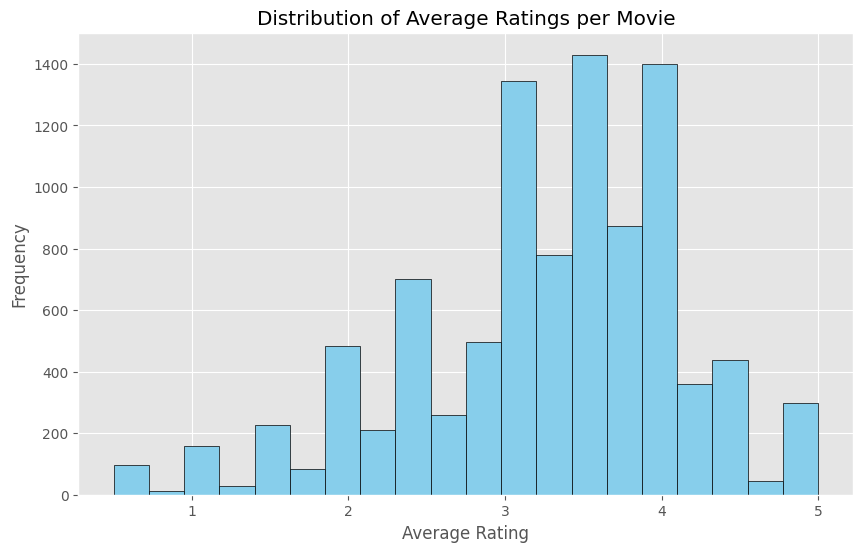

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(average_rating_per_movie, bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Average Ratings per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.show()


- Make a visualization of the distribution of average ratings per movie

In [53]:
# Find the movie with the highest average rating
best_movie = average_rating_per_movie.idxmax()

# Find the movie with the lowest average rating
worst_movie = average_rating_per_movie.idxmin()

print("The movie with the highest average rating is:", best_movie)
print("The movie with the lowest average rating is:", worst_movie)

# Filter out movies rated by less than 30 users
filtered_average_ratings = average_rating_per_movie[merged_df.groupby('title')['rating'].count() >= 30]

# Find the movie with the highest average rating among the filtered movies
best_movie_filtered = filtered_average_ratings.idxmax()

# Find the movie with the lowest average rating among the filtered movies
worst_movie_filtered = filtered_average_ratings.idxmin()

print("The movie with the highest average rating (filtered) is:", best_movie_filtered)
print("The movie with the lowest average rating (filtered) is:", worst_movie_filtered)


The movie with the highest average rating is: 'Salem's Lot (2004)
The movie with the lowest average rating is: 3 Ninjas Knuckle Up (1995)
The movie with the highest average rating (filtered) is: Shawshank Redemption, The (1994)
The movie with the lowest average rating (filtered) is: Godzilla (1998)


- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

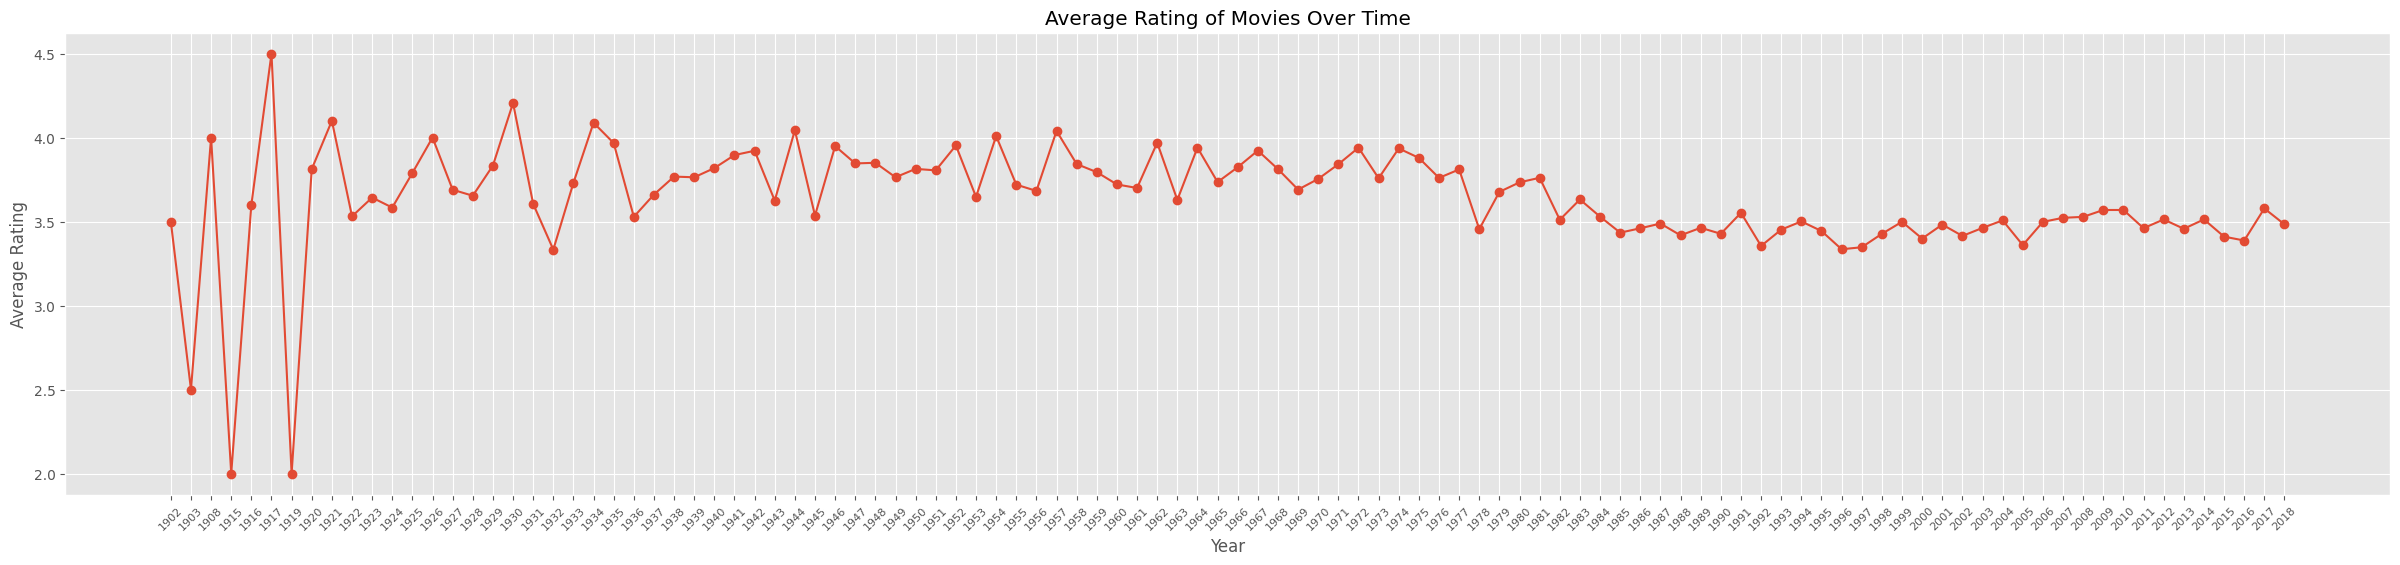

In [71]:
import matplotlib.pyplot as plt

# Group the data by 'year' and calculate the average rating for each year
average_rating_by_year = merged_df.groupby('year')['rating'].mean()

# Increase the figure size
plt.figure(figsize=(30, 6))

# Create a line plot to visualize the average rating over time
plt.plot(average_rating_by_year.index, average_rating_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating of Movies Over Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.xticks(fontsize=8)  # Decrease the font size of x-axis labels
plt.grid(True)
plt.show()


- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!

- ***Find the user item matrix***

#### Calculate the number of ratings per movie
#### filter for movies with more than 20 ratings and extract the index


In [82]:
# calculate the number of ratings per movie
rating_count = rate.groupby('movieId')[['rating']].count()

# filter for movies with more than 20 ratings and extract the index
popular_movies = rating_count[rating_count['rating']>20].index

# filter the ratings matrix and only keep the popular movies
df = rate[rate['movieId'].isin(popular_movies)].copy()

In [83]:
# remake user ids and movie ids since they are not sequential

user_ids = df["userId"].unique()
user_id_map = {v:k for k,v in enumerate(user_ids)}
df["userId"] = df["userId"].map(user_id_map)

movie_ids = df['movieId'].unique()
movie_id_map = {v:k for k,v in enumerate(movie_ids)}
df['movieId'] = df['movieId'].map(movie_id_map)

In [85]:
# Initialize a sparse user-item rating matrix
# (data, (row_ind, col_ind)
R = csr_matrix((df['rating'], (df['userId'], df['movieId']))) 
R.shape

(610, 1235)

In [87]:
# Accessing elements
element = R[0, 0]  # Access element at row 0, column 0

# Sum of all elements
total_sum = R.sum()

# Transpose the sparse matrix
transpose_matrix = R.T

# Perform matrix multiplication
result = R.dot(transpose_matrix)


In [93]:
import pandas as pd
from scipy.sparse import csr_matrix
# Look at the matrix
# Convert the sparse matrix to a dense matrix
dense_matrix = R.todense()

# Create a DataFrame from the dense matrix
df = pd.DataFrame(dense_matrix)

# Display the DataFrame
print(df)


     0     1     2     3     4     5     6     7     8     9     ...  1225   
0     4.0   4.0   4.0   5.0   5.0   3.0   5.0   4.0   5.0   5.0  ...   0.0  \
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3     0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4     4.0   0.0   0.0   0.0   4.0   0.0   0.0   4.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
605   2.5   0.0   0.0   3.0   4.5   4.0   0.0   3.5   0.0   0.0  ...   0.0   
606   4.0   0.0   0.0   0.0   0.0   0.0   0.0   5.0   0.0   0.0  ...   0.0   
607   2.5   2.0   0.0   4.5   4.5   3.0   0.0   4.0   0.0   3.0  ...   0.0   
608   3.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0  ...   0.0   
609   5.0   0.0   5.0   5.0   4.0   4.0   0.0   4.5   0.0   0.0  ...   0.0   

     1226  1227  1228  1229  1230  1231  1232  1233  1234  
0  

In [104]:
#3 create baseline recommender
average_ratings = rate.groupby('movieId')['rating'].mean()
popular_movies = average_ratings[average_ratings.index.isin(rate['movieId'].value_counts()[rate['movieId'].value_counts() >= 20].index)]

def recommend_popular(query, ratings, k=10):
    rated_movies = set(query.keys())
    recommendations = popular_movies[~popular_movies.index.isin(rated_movies)].head(k)
    recommended_movies = movie[movie['movieId'].isin(recommendations.index)]
    return recommended_movies[['movieId', 'title']].values.tolist()

# Usage example:
user_query = {12: 5, 234: 1, 567: 4.5}
recommended_movies = recommend_popular(user_query, rate, k=10)
recommended_movies



[[1, 'Jumanji (1995)'],
 [2, 'Grumpier Old Men (1995)'],
 [3, 'Waiting to Exhale (1995)'],
 [5, 'Heat (1995)'],
 [6, 'Sabrina (1995)'],
 [7, 'Tom and Huck (1995)'],
 [10, 'American President, The (1995)'],
 [11, 'Dracula: Dead and Loving It (1995)'],
 [16, 'Sense and Sensibility (1995)'],
 [17, 'Four Rooms (1995)']]